<a href="https://colab.research.google.com/github/sayantikag98/Depression_Analysis/blob/master/Depression_analysis_from_tweets_(Data_preprocessing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive ## to mount the google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import nltk  ### nltk is the most important library used for text preprocessing 

In [3]:
nltk.download('all') ### this download all the libraries of nltk

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [4]:
import pandas as pd     ## to read the different .csv files from google drive
import numpy as np

df=pd.read_csv("drive/My Drive/data_depressed.csv",parse_dates=['date'],encoding='utf-8')
df1=pd.read_csv("drive/My Drive/data_random.csv",parse_dates=['date'],encoding='utf-8')
df2=pd.read_csv("drive/My Drive/data_depressed1.csv",parse_dates=['date'],encoding='utf-8')
df3=pd.read_csv("drive/My Drive/data_random1.csv",parse_dates=['date'],encoding='utf-8')
df4=pd.read_csv("drive/My Drive/data_random_1.csv",parse_dates=['date'],encoding='utf-8')

In [5]:
df_combined=pd.concat([df,df1,df2,df3,df4],ignore_index=True)      ### to combine the different dataset into one
df_combined.sort_values(by='date',ascending=False,ignore_index=True,inplace=True)     ## sort the dataframe according to the date column


In [6]:
#df_combined.apply(lambda x: pd.lib.infer_dtype(x.values))

In [7]:
df_combined.duplicated(subset=None,keep='first')   ## to check for duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
310082     True
310083    False
310084     True
310085    False
310086     True
Length: 310087, dtype: bool

In [8]:
df_combined.tail(10)   

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
310077,2010-09-14 07:26:25,krist0ph3r,NaN,0,0,0,"I stand corrected. there is, indeed, a vaccine...",NaN,@mizarcle,NaN,24456504000,https://twitter.com/krist0ph3r/status/24456504000
310078,2010-09-14 07:26:25,krist0ph3r,NaN,0,0,0,"I stand corrected. there is, indeed, a vaccine...",NaN,@mizarcle,NaN,24456504000,https://twitter.com/krist0ph3r/status/24456504000
310079,2010-09-14 07:15:04,krist0ph3r,NaN,0,0,0,#iWant! RT @24HoursLoot The Four Elements of a...,NaN,@24HoursLoot,#iWant,24456008845,https://twitter.com/krist0ph3r/status/24456008845
310080,2010-09-14 07:15:04,krist0ph3r,NaN,0,0,0,#iWant! RT @24HoursLoot The Four Elements of a...,NaN,@24HoursLoot,#iWant,24456008845,https://twitter.com/krist0ph3r/status/24456008845
310081,2010-09-14 07:12:15,krist0ph3r,NaN,0,0,0,there's a vaccine? don't think cancer can be v...,NaN,@mizarcle,NaN,24455883030,https://twitter.com/krist0ph3r/status/24455883030
310082,2010-09-14 07:12:15,krist0ph3r,NaN,0,0,0,there's a vaccine? don't think cancer can be v...,NaN,@mizarcle,NaN,24455883030,https://twitter.com/krist0ph3r/status/24455883030
310083,2010-09-14 07:10:56,krist0ph3r,NaN,0,0,0,#nowplaying gareth emery - exposure #awesomeness,NaN,NaN,#nowplaying #awesomeness,24455823620,https://twitter.com/krist0ph3r/status/24455823620
310084,2010-09-14 07:10:56,krist0ph3r,NaN,0,0,0,#nowplaying gareth emery - exposure #awesomeness,NaN,NaN,#nowplaying #awesomeness,24455823620,https://twitter.com/krist0ph3r/status/24455823620
310085,2010-09-14 05:21:30,krist0ph3r,NaN,0,0,0,friend was waiting for me to step into office ...,NaN,NaN,NaN,24450570759,https://twitter.com/krist0ph3r/status/24450570759
310086,2010-09-14 05:21:30,krist0ph3r,NaN,0,0,0,friend was waiting for me to step into office ...,NaN,NaN,NaN,24450570759,https://twitter.com/krist0ph3r/status/24450570759


In [9]:
df_combined.drop_duplicates(subset=None,ignore_index=True,inplace=True)    ## to drop the duplicate rows

In [10]:
df_combined.tail()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
266472,2010-09-14 07:26:25,krist0ph3r,NaN,0,0,0,"I stand corrected. there is, indeed, a vaccine...",NaN,@mizarcle,NaN,24456504000,https://twitter.com/krist0ph3r/status/24456504000
266473,2010-09-14 07:15:04,krist0ph3r,NaN,0,0,0,#iWant! RT @24HoursLoot The Four Elements of a...,NaN,@24HoursLoot,#iWant,24456008845,https://twitter.com/krist0ph3r/status/24456008845
266474,2010-09-14 07:12:15,krist0ph3r,NaN,0,0,0,there's a vaccine? don't think cancer can be v...,NaN,@mizarcle,NaN,24455883030,https://twitter.com/krist0ph3r/status/24455883030
266475,2010-09-14 07:10:56,krist0ph3r,NaN,0,0,0,#nowplaying gareth emery - exposure #awesomeness,NaN,NaN,#nowplaying #awesomeness,24455823620,https://twitter.com/krist0ph3r/status/24455823620
266476,2010-09-14 05:21:30,krist0ph3r,NaN,0,0,0,friend was waiting for me to step into office ...,NaN,NaN,NaN,24450570759,https://twitter.com/krist0ph3r/status/24450570759


In [11]:
df_combined.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,2020-08-14 23:40:49,DalrympleWill,HearaichHerald,2,0,3,Andrew do send me a copy! Love to read it,NaN,NaN,NaN,1294418731251138562,https://twitter.com/DalrympleWill/status/12944...
1,2020-08-14 23:29:59,lostboy54,ishkarnBHANDARI,10,85,403,This is all coming true. You were right @ishka...,NaN,@ishkarnBHANDARIhttps,NaN,1294416005674889216,https://twitter.com/lostboy54/status/129441600...
2,2020-08-14 23:27:45,srijanpalsingh,NaN,3,34,151,Wishing everyone a very happy Independence Day...,NaN,NaN,#India #JaiHind #Kalam #IndependenceDay #Indep...,1294415445609472000,https://twitter.com/srijanpalsingh/status/1294...
3,2020-08-14 23:09:49,AAlHamoud7,NaN,0,0,7,"I don’t usually approach first, so when I do, ...",NaN,NaN,NaN,1294410930458173440,https://twitter.com/AAlHamoud7/status/12944109...
4,2020-08-14 22:21:57,MeerraChopra,NaN,28,19,278,#GunjanSaxena is such a brilliant film that ul...,NaN,@TripathiiPankaj,#GunjanSaxena #jhanvikapoor #sharansharma,1294398885654220800,https://twitter.com/MeerraChopra/status/129439...


In [12]:
df_combined.shape

(266477, 12)

In [13]:
df_combined.columns

Index(['date', 'username', 'to', 'replies', 'retweets', 'favorites', 'text',
       'geo', 'mentions', 'hashtags', 'id', 'permalink'],
      dtype='object')

In [14]:
df_combined.text=df_combined.text.astype('str')
df_combined.text.isna().sum()
df_combined.text.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
266472    False
266473    False
266474    False
266475    False
266476    False
Name: text, Length: 266477, dtype: bool

In [15]:
type(df_combined.text[0])

str

In [16]:
### to tokenize sentences
text=df_combined['text'].values

df_combined["sentences"] = (df_combined["text"].map(nltk.sent_tokenize))


In [17]:
#for i in range(len(df_combined.sentences)):
df_combined.sentences=df_combined.sentences.str.join(" ")

In [18]:
#### to tokenize words
df_combined['text_tokenized']=df_combined['text'].map(nltk.word_tokenize)

In [19]:
df_combined.sentences[0]

'Andrew do send me a copy! Love to read it'

In [20]:
df_combined.shape
df_combined.text_tokenized[0]

['Andrew', 'do', 'send', 'me', 'a', 'copy', '!', 'Love', 'to', 'read', 'it']

**STEMMING**

In [21]:
from nltk.stem import PorterStemmer ## library for stemming
from nltk.corpus import stopwords ## library for stopwords
import re

In [22]:
#stopwords.words('english') ## prints the stopwords in the english language

In [23]:
stemmer= PorterStemmer()

In [24]:
# sentences=[]
# words=[stemmer.stem(word) for word in df_combined.text_tokenized[0] if word not in (stopwords.words('english'))]
# sentences.append(' '.join(words))
# sentences

In [25]:
sentences=[] ## word noramlization technique-stemming
for val in df_combined.sentences:
  words=re.sub('[^a-zA-Z]',' ',val)
  words=words.lower()
  words=words.split()
  words=[stemmer.stem(word) for word in words if word not in set (stopwords.words('english'))]
  sentences.append(' '.join(words))


  

In [26]:
df_combined['sentences_stopwordsRemoved']=pd.Series(sentences,index=df_combined.index)


In [27]:
df_combined.rename(columns={'sentences_stopwordsRemoved':'stemming_stopwordsRemoved'},inplace=True)
df_combined

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,sentences,text_tokenized,stemming_stopwordsRemoved
0,2020-08-14 23:40:49,DalrympleWill,HearaichHerald,2,0,3,Andrew do send me a copy! Love to read it,NaN,NaN,NaN,1294418731251138562,https://twitter.com/DalrympleWill/status/12944...,Andrew do send me a copy! Love to read it,"[Andrew, do, send, me, a, copy, !, Love, to, r...",andrew send copi love read
1,2020-08-14 23:29:59,lostboy54,ishkarnBHANDARI,10,85,403,This is all coming true. You were right @ishka...,NaN,@ishkarnBHANDARIhttps,NaN,1294416005674889216,https://twitter.com/lostboy54/status/129441600...,This is all coming true. You were right @ishka...,"[This, is, all, coming, true, ., You, were, ri...",come true right ishkarnbhandarihttp twitter co...
2,2020-08-14 23:27:45,srijanpalsingh,NaN,3,34,151,Wishing everyone a very happy Independence Day...,NaN,NaN,#India #JaiHind #Kalam #IndependenceDay #Indep...,1294415445609472000,https://twitter.com/srijanpalsingh/status/1294...,Wishing everyone a very happy Independence Day...,"[Wishing, everyone, a, very, happy, Independen...",wish everyon happi independ day time gratitud ...
3,2020-08-14 23:09:49,AAlHamoud7,NaN,0,0,7,"I don’t usually approach first, so when I do, ...",NaN,NaN,NaN,1294410930458173440,https://twitter.com/AAlHamoud7/status/12944109...,"I don’t usually approach first, so when I do, ...","[I, don, ’, t, usually, approach, first, ,, so...",usual approach first probabl special
4,2020-08-14 22:21:57,MeerraChopra,NaN,28,19,278,#GunjanSaxena is such a brilliant film that ul...,NaN,@TripathiiPankaj,#GunjanSaxena #jhanvikapoor #sharansharma,1294398885654220800,https://twitter.com/MeerraChopra/status/129439...,#GunjanSaxena is such a brilliant film that ul...,"[#, GunjanSaxena, is, such, a, brilliant, film...",gunjansaxena brilliant film ull get adrenalin ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266472,2010-09-14 07:26:25,krist0ph3r,NaN,0,0,0,"I stand corrected. there is, indeed, a vaccine...",NaN,@mizarcle,NaN,24456504000,https://twitter.com/krist0ph3r/status/24456504000,"I stand corrected. there is, indeed, a vaccine...","[I, stand, corrected, ., there, is, ,, indeed,...",stand correct inde vaccin cervic cancer except...
266473,2010-09-14 07:15:04,krist0ph3r,NaN,0,0,0,#iWant! RT @24HoursLoot The Four Elements of a...,NaN,@24HoursLoot,#iWant,24456008845,https://twitter.com/krist0ph3r/status/24456008845,#iWant! RT @24HoursLoot The Four Elements of a...,"[#, iWant, !, RT, @, 24HoursLoot, The, Four, E...",iwant rt hoursloot four element human geek lif...
266474,2010-09-14 07:12:15,krist0ph3r,NaN,0,0,0,there's a vaccine? don't think cancer can be v...,NaN,@mizarcle,NaN,24455883030,https://twitter.com/krist0ph3r/status/24455883030,there's a vaccine? don't think cancer can be v...,"[there, 's, a, vaccine, ?, do, n't, think, can...",vaccin think cancer vaccin rt mizarcl anyon ta...
266475,2010-09-14 07:10:56,krist0ph3r,NaN,0,0,0,#nowplaying gareth emery - exposure #awesomeness,NaN,NaN,#nowplaying #awesomeness,24455823620,https://twitter.com/krist0ph3r/status/24455823620,#nowplaying gareth emery - exposure #awesomeness,"[#, nowplaying, gareth, emery, -, exposure, #,...",nowplay gareth emeri exposur awesom


In [28]:
type(df_combined.stemming_stopwordsRemoved)

pandas.core.series.Series

In [29]:
#df_combined.to_csv('pre_final1.csv',index=False)

**LEMMATIZATION**

In [30]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [31]:
sentences_1=[] ## word noramlization technique-lemmatization
for val in df_combined.sentences:
  words=re.sub('[^a-zA-Z]',' ',val)
  words=words.lower()
  words=words.split()
  words=[lemmatizer.lemmatize(word) for word in words if word not in set (stopwords.words('english'))]
  sentences_1.append(' '.join(words))

In [32]:
df_combined['lemmatized_stopwordsRemoved']=pd.Series(sentences_1,index=df_combined.index)


In [33]:
df_combined

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,sentences,text_tokenized,stemming_stopwordsRemoved,lemmatized_stopwordsRemoved
0,2020-08-14 23:40:49,DalrympleWill,HearaichHerald,2,0,3,Andrew do send me a copy! Love to read it,NaN,NaN,NaN,1294418731251138562,https://twitter.com/DalrympleWill/status/12944...,Andrew do send me a copy! Love to read it,"[Andrew, do, send, me, a, copy, !, Love, to, r...",andrew send copi love read,andrew send copy love read
1,2020-08-14 23:29:59,lostboy54,ishkarnBHANDARI,10,85,403,This is all coming true. You were right @ishka...,NaN,@ishkarnBHANDARIhttps,NaN,1294416005674889216,https://twitter.com/lostboy54/status/129441600...,This is all coming true. You were right @ishka...,"[This, is, all, coming, true, ., You, were, ri...",come true right ishkarnbhandarihttp twitter co...,coming true right ishkarnbhandarihttps twitter...
2,2020-08-14 23:27:45,srijanpalsingh,NaN,3,34,151,Wishing everyone a very happy Independence Day...,NaN,NaN,#India #JaiHind #Kalam #IndependenceDay #Indep...,1294415445609472000,https://twitter.com/srijanpalsingh/status/1294...,Wishing everyone a very happy Independence Day...,"[Wishing, everyone, a, very, happy, Independen...",wish everyon happi independ day time gratitud ...,wishing everyone happy independence day time g...
3,2020-08-14 23:09:49,AAlHamoud7,NaN,0,0,7,"I don’t usually approach first, so when I do, ...",NaN,NaN,NaN,1294410930458173440,https://twitter.com/AAlHamoud7/status/12944109...,"I don’t usually approach first, so when I do, ...","[I, don, ’, t, usually, approach, first, ,, so...",usual approach first probabl special,usually approach first probably special
4,2020-08-14 22:21:57,MeerraChopra,NaN,28,19,278,#GunjanSaxena is such a brilliant film that ul...,NaN,@TripathiiPankaj,#GunjanSaxena #jhanvikapoor #sharansharma,1294398885654220800,https://twitter.com/MeerraChopra/status/129439...,#GunjanSaxena is such a brilliant film that ul...,"[#, GunjanSaxena, is, such, a, brilliant, film...",gunjansaxena brilliant film ull get adrenalin ...,gunjansaxena brilliant film ull get adrenaline...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266472,2010-09-14 07:26:25,krist0ph3r,NaN,0,0,0,"I stand corrected. there is, indeed, a vaccine...",NaN,@mizarcle,NaN,24456504000,https://twitter.com/krist0ph3r/status/24456504000,"I stand corrected. there is, indeed, a vaccine...","[I, stand, corrected, ., there, is, ,, indeed,...",stand correct inde vaccin cervic cancer except...,stand corrected indeed vaccine cervical cancer...
266473,2010-09-14 07:15:04,krist0ph3r,NaN,0,0,0,#iWant! RT @24HoursLoot The Four Elements of a...,NaN,@24HoursLoot,#iWant,24456008845,https://twitter.com/krist0ph3r/status/24456008845,#iWant! RT @24HoursLoot The Four Elements of a...,"[#, iWant, !, RT, @, 24HoursLoot, The, Four, E...",iwant rt hoursloot four element human geek lif...,iwant rt hoursloot four element human geek lif...
266474,2010-09-14 07:12:15,krist0ph3r,NaN,0,0,0,there's a vaccine? don't think cancer can be v...,NaN,@mizarcle,NaN,24455883030,https://twitter.com/krist0ph3r/status/24455883030,there's a vaccine? don't think cancer can be v...,"[there, 's, a, vaccine, ?, do, n't, think, can...",vaccin think cancer vaccin rt mizarcl anyon ta...,vaccine think cancer vaccinated rt mizarcle an...
266475,2010-09-14 07:10:56,krist0ph3r,NaN,0,0,0,#nowplaying gareth emery - exposure #awesomeness,NaN,NaN,#nowplaying #awesomeness,24455823620,https://twitter.com/krist0ph3r/status/24455823620,#nowplaying gareth emery - exposure #awesomeness,"[#, nowplaying, gareth, emery, -, exposure, #,...",nowplay gareth emeri exposur awesom,nowplaying gareth emery exposure awesomeness


**PLOT**

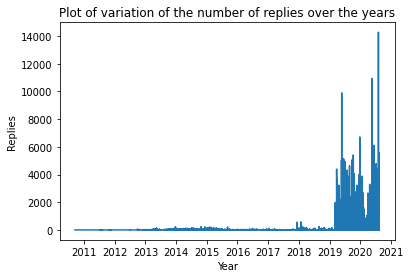

In [34]:
import matplotlib.pyplot as plt
plt.plot(df_combined['date'],df_combined['replies'])
plt.xlabel("Year")
plt.ylabel("Replies")
plt.title("Plot of variation of the number of replies over the years")
plt.show()

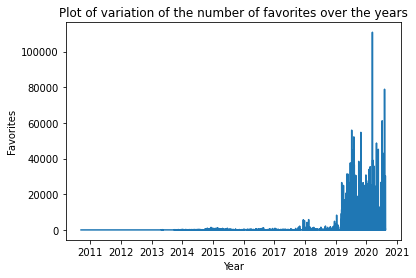

In [35]:
plt.plot(df_combined['date'],df_combined['favorites'])
plt.xlabel("Year")
plt.ylabel("Favorites")
plt.title("Plot of variation of the number of favorites over the years")
plt.show()

In [38]:
df_combined.to_csv('pre_final1.csv',index=False)